# Collaboration and Competition


### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.5 which is incompatible.


**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment
The cell below shows how to use the Python API to control the agents and receive feedback from the environment. Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.



In [5]:
# for i in range(5):                                         # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. Training The Agents


In [6]:
from  collections  import deque
from itertools import count
import torch
import time
import matplotlib.pyplot as plt
from ddpg_agent import DDPGAgent
from ddpg_network import Actor, Critic
from multi_agent_ddpg import MADDPG

random_seed=5
meta_agent = MADDPG(num_agents=num_agents,state_size=state_size, action_size=action_size,random_seed=random_seed)

meta_agent.state_size, action_size,num_agents,seed_agent_idx 24 2 2 5 0
Critic,seed 5
Critic,seed 5
Agent: 0 
 Actor-Critic 
 Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=2, bias=True)
) Critic(
  (fc1): Linear(in_features=52, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=1, bias=True)
)
meta_agent.state_size, action_size,num_agents,seed_agent_idx 24 2 2 5 1
Critic,seed 5
Critic,seed 5
Agent: 1 
 Actor-Critic 
 Actor(
  (fc1): Linear(in_features=24, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_featur

In [8]:
def train_maddpg(n_episodes=10000, max_t=1000):
    avg_score = []          
    scores=[] # list containing scores from each episode
    scores_window = deque(maxlen=100)
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        meta_agent.reset_agents()
        states = env_info.vector_observations
        score = np.zeros(num_agents)   
        for t in range(max_t):
            actions = meta_agent.act(states, add_noise=True)
            #Take action and observe reward and next state
            env_info = env.step(actions)[brain_name]        # send the actions to the environment
            next_states = env_info.vector_observations      # get the next states
            rewards = env_info.rewards                      # get the rewards
            dones = env_info.local_done                     # see if episode has finished               
            #Store experience tuple (s,a,s',r) in replay memory and learn from minibatch
            meta_agent.step(states, actions, rewards, next_states, dones, i_episode)
            states = next_states
            score += rewards
            if np.any(dones):
                break 
        scores_window.append(np.max(score)) # episode score is max of the agents
        scores.append(score)              # save most recent score
        avg_score= np.mean(scores_window)          
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode%100==0:
            print('\n Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            meta_agent.save_checkpoint()
        if avg_score>0.5:
            print('\n Episode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
            print('Environment solved!')
            meta_agent.save_checkpoint()
            return scores,avg_score
    return scores,avg_score

In [9]:
%%time
scores,avg_score = train_maddpg(10000,2000)


Episode 100	Average Score: 0.00
Episode 200	Average Score: 0.020
Episode 300	Average Score: 0.042
Episode 400	Average Score: 0.064
Episode 500	Average Score: 0.046
Episode 600	Average Score: 0.014
Episode 700	Average Score: 0.001
Episode 800	Average Score: 0.000
Episode 900	Average Score: 0.000
Episode 1000	Average Score: 0.00
Episode 1100	Average Score: 0.030
Episode 1200	Average Score: 0.043
Episode 1300	Average Score: 0.044
Episode 1400	Average Score: 0.064
Episode 1500	Average Score: 0.096
Episode 1600	Average Score: 0.099
Episode 1700	Average Score: 0.099
Episode 1800	Average Score: 0.069
Episode 1900	Average Score: 0.076
Episode 2000	Average Score: 0.097
Episode 2100	Average Score: 0.109
Episode 2200	Average Score: 0.090
Episode 2300	Average Score: 0.109
Episode 2400	Average Score: 0.100
Episode 2500	Average Score: 0.100
Episode 2600	Average Score: 0.090
Episode 2700	Average Score: 0.129
Episode 2800	Average Score: 0.472
Episode 2810	Average Score: 0.507
 Episode 2810	Average Sco

In [10]:
#Save scores
env.close()
np.save('MADDPG_scores.npy', np.array(scores))
np.save('MADDPG_avg_scores.npy', np.array(avg_score))

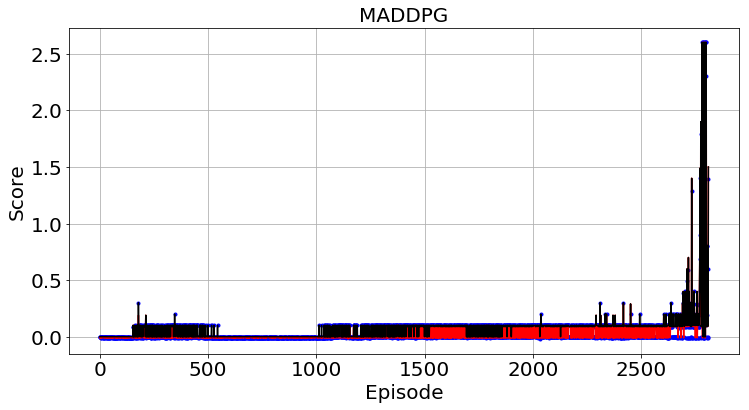

In [13]:
import numpy as np

scores = np.load('MADDPG_scores.npy')
scores=np.asarray(scores)

plt.figure(figsize=(12,6))
plt.rc('font', size=20)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=20)    # fontsize of the tick labels
plt.rc('ytick', labelsize=20)    # fontsize of the tick labels
plt.rc('legend', fontsize=20)    # legend fontsize
plt.rc('figure', titlesize=20)  # fontsize of the figure title
plt.plot(scores[:,0],'b.')
plt.plot(scores[:,1],'r')
plt.plot(np.amax(scores,axis=1),'k')
plt.grid()
plt.xlabel('Episode')
plt.ylabel('Score')
plt.title('MADDPG')
plt.show()